## NOTEBOOK 03

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### EXERCISE 03.1

In this exercise we will apply Monte Carlo methods to simulate an economic problem : pricing the plain vanilla options. 


We will use the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

1) The Black and Scholes theory gives an analytical answer to this problem, based on a couple of assumptions. These assumptions make the time evolution of the asset price a Geometric Brownian Motion (GBM) with constant drift and volatility, and it's by using its characteristics that they are able to formulate an analytical solution.

On the other hand, we have numerical methods that are not restricted to a specific case but are more generalizable.
The first thing we can do, by using the particular properties of the GBM, is to sample directly the asset price at time T. 
This can be done by extracting samples $Z_{i}$ from a normal distribution with $\mu=0$ and $\sigma=1$ and use them to sample

$$
S_{i}(T)=S(0)\exp[(r-\sigma^{2}/2)T+\sigma Z_{i}\sqrt{T}]
$$

and then the call price

$$
C_{i}=\exp(-rT)\max[0,S_{i}(T)-K]
$$

or the put price

$$
P_{i}=\exp(-rT)\max[0,K-S_{i}(T)]
$$


We then use the blocking method to have an estimate of the actual value and of the error.



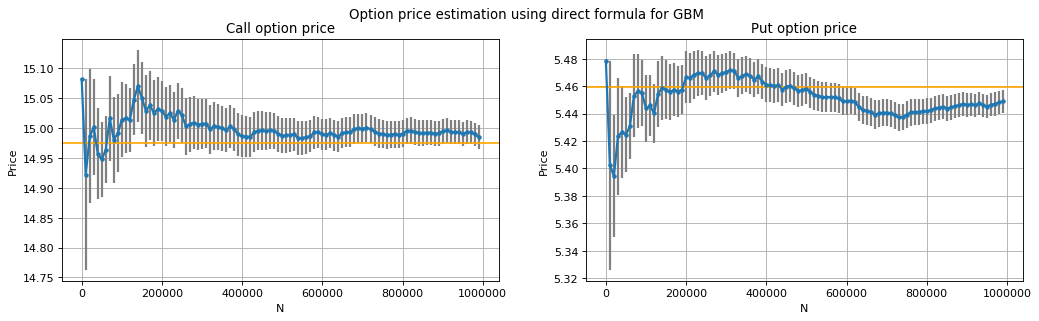

In [2]:
# Now we create the plot for the direct method of call and put option

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15.5,4),dpi=80)

# Call option subplot

data1=open('data/Direct_call.txt','r').read().split('\n')

data1=[x.split(',') for x in data1]


x1= np.zeros(len(data1)-1)
y1= np.zeros(len(data1)-1)
y1_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    x1[i]=data1[i][0]
    y1[i]=data1[i][1]
    y1_err[i]=data1[i][2]
    
# Pull option subplot

data2=open('data/Direct_put.txt','r').read().split('\n')

data2=[x.split(',') for x in data2]


x2= np.zeros(len(data2)-1)
y2= np.zeros(len(data2)-1)
y2_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    x2[i]=data2[i][0]
    y2[i]=data2[i][1]
    y2_err[i]=data2[i][2]
    
    
## Now we create the plot

ax1.errorbar(x1,y1,yerr=y1_err,marker=".",lw=2,ecolor='gray')
ax1.axhline(14.975790778311286,color='orange')
ax1.set_title('Call option price')
ax1.set(xlabel='N', ylabel='Price')

ax2.errorbar(x2,y2,yerr=y2_err,marker=".",lw=2,ecolor='gray')
ax2.axhline(5.4595325819072364,color='orange')
ax2.set_title('Put option price')
ax2.set(xlabel='N', ylabel='Price')

fig.suptitle("Option price estimation using direct formula for GBM")
ax1.grid(True)
ax2.grid(True)
plt.show()
plt.close()

2) Otherwise we can just use the iteration formula 
$$
S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]    
$$ 

with $Z_i \sim \mathcal{N}(0,1)$,to obtain a sample of $S(T)$ and then calculate the call and put option price.
    
This method is exact, in the sense that it reproduces a sequence with the same joint distribution of the process $S \sim GBM(\mu,\sigma^{2})$ at $t_{0} , t_{1} , \dots, t_{n}$, and can be easily extended to processes with time-dependent $\sigma(t)$ and $\mu(t)$.

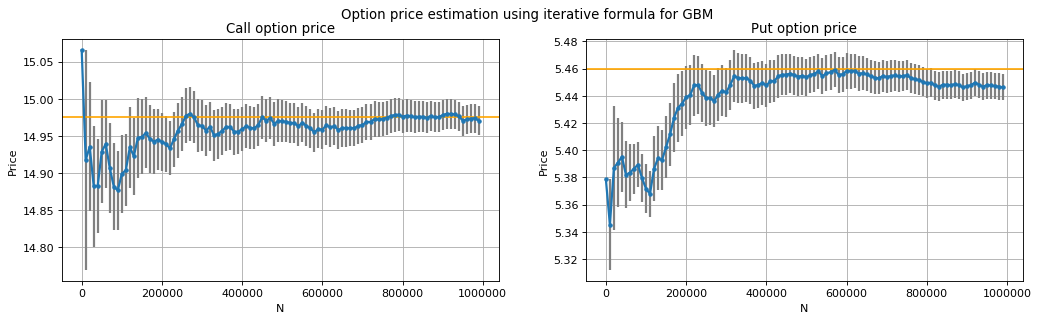

In [3]:
fig2, (ax3, ax4) = plt.subplots(1, 2,figsize=(15.5,4),dpi=80)

# Call option subplot

data1=open('data/Iterative_call.txt','r').read().split('\n')

data1=[x.split(',') for x in data1]


x1= np.zeros(len(data1)-1)
y1= np.zeros(len(data1)-1)
y1_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    x1[i]=data1[i][0]
    y1[i]=data1[i][1]
    y1_err[i]=data1[i][2]
    
# Pull option subplot

data2=open('data/Iterative_put.txt','r').read().split('\n')

data2=[x.split(',') for x in data2]


x2= np.zeros(len(data2)-1)
y2= np.zeros(len(data2)-1)
y2_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    x2[i]=data2[i][0]
    y2[i]=data2[i][1]
    y2_err[i]=data2[i][2]
    
    
## Now we create the plot

ax3.errorbar(x1,y1,yerr=y1_err,marker=".",lw=2,ecolor='gray')
ax3.axhline(14.975790778311286,color='orange')
ax3.set_title('Call option price')
ax3.set(xlabel='N', ylabel='Price')

ax4.errorbar(x2,y2,yerr=y2_err,marker=".",lw=2,ecolor='gray')
ax4.axhline(5.4595325819072364,color='orange')
ax4.set_title('Put option price')
ax4.set(xlabel='N', ylabel='Price')

fig2.suptitle("Option price estimation using iterative formula for GBM")
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()